# Airline Data Analysis
## Overview and goals

With the COVID-19 pandemic hitting the airline industry hard with significant losses in 2020 and 2021, the airline industry is now getting back on track in 2023 and 2024. In this data analysis, an airline database will be analyzed to identify ways to help further increase the profit of an airline company. The main goal of the analysis is to show through data how the airline can increase their profits by improving flight occupancy rates, prioritizing certain types of aircraft, and prioritizing certain types of aircraft seating on certain aircraft. 

Python and SQL will be leveraged to conduct the analysis. The personal goals for the project are to demonstrate proficiency in data analysis, data cleaning, data visualization, Python (pandas, matplotlib, and seaborn packages), and SQL queries (SELECT, JOINs, GROUP BYs), utilizing all throughout the project. We will conduct an exploratory data analysis and answer the analysis questions below.

## Analysis Questions

1. How can the profit of the airline be increased?
2. Can increasing occupancy rate on all aircrafts increase revenue?
3. Are there certain aircraft types we can use more to generate a higher profit?
4. Are there certain aircraft seating types we can prioritize to generate more earnings?


## Database
The airlines database obtained from Kaggle contains eight tables: aircraft data, airport data, boarding pass, bookings data, flights, seats, ticket flights, and tickets.

## Connecting to database

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
db_path = r'C:\Users\malop\Documents\airline-analysis\travel.sqlite'
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

In [3]:
# Print names of 8 tables in the database

cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_list = [table[0] for table in cursor.fetchall()]
table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Exploratory data analysis

In the exploratory data analysis, we will print each data table provided to us and examine at the data provided. For each table we will look at the data types provided, if there are any null values in the data, and max/min values of numerical values. We will calculate basic statistics such as mean, median, mode, etc. of each numeric field. Additionally, we will create basic visualizations of the data.

### aircrafts_data table
We observe that we are given model in English and Russian in a json format, we will later modify the table to keep just the English model name.

In [4]:
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


### airports_data table
Again, we are given airport_name and city in both Russian and English and will modify later to keep just the English name.

In [5]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


### boarding_passes table

In [6]:
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


### bookings table
total_amount is likely in Russian rubles. 1 Russian ruble is equal to 0.011 USD.

In [7]:
bookings = pd.read_sql_query("SELECT * FROM bookings", connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


### flights table

In [8]:
flights = pd.read_sql_query("SELECT * FROM flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


### seats table

In [9]:
seats = pd.read_sql_query("SELECT * FROM seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


### ticket_flights table

In [10]:
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


### tickets table

In [11]:
tickets = pd.read_sql_query("SELECT * FROM tickets", connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


### Check for null values in each table

In [12]:
for table in table_list:
    query = f"SELECT * FROM {table}"
    data = pd.read_sql_query(query, connection)
    
    # Check for null values in each column
    null_values = data.isnull().sum()
    
    # Print the table name and corresponding null values
    print(f"Null values in table '{table}':\n{null_values}\n")

Null values in table 'aircrafts_data':
aircraft_code    0
model            0
range            0
dtype: int64

Null values in table 'airports_data':
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Null values in table 'boarding_passes':
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Null values in table 'bookings':
book_ref        0
book_date       0
total_amount    0
dtype: int64

Null values in table 'flights':
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Null values in table 'seats':
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Null values in table 'ticket_flights':
ticket_no          0
flight_id          0
fare_conditions    0
amount             0

### Check data types contained in each table

In [13]:
# Iterate through each table and check the data types of each column
for table in table_list:
    query = f"PRAGMA table_info({table})"
    table_info = pd.read_sql_query(query, connection)
    
    # Extract column names and data types
    column_data_types = table_info[['name', 'type']]
    
    # Print the table name and corresponding column data types
    print(f"Data types in table '{table}':\n{column_data_types}\n")

Data types in table 'aircrafts_data':
            name          type
0  aircraft_code  character(3)
1          model         jsonb
2          range       INTEGER

Data types in table 'airports_data':
           name          type
0  airport_code  character(3)
1  airport_name         jsonb
2          city         jsonb
3   coordinates         point
4      timezone          TEXT

Data types in table 'boarding_passes':
          name                  type
0    ticket_no         character(13)
1    flight_id               INTEGER
2  boarding_no               INTEGER
3      seat_no  character varying(4)

Data types in table 'bookings':
           name                      type
0      book_ref              character(6)
1     book_date  timestamp with time zone
2  total_amount             numeric(10,2)

Data types in table 'flights':
                  name                      type
0            flight_id                   INTEGER
1            flight_no              character(6)
2  scheduled_de

## Calculating statistics for relevant numerical variables in table

### Statistics of aircraft ranges

In [14]:
range_column = pd.read_sql_query("SELECT range FROM aircrafts_data", connection)['range']

# Set display options to show values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display basic statistics for the 'range' column
statistics_summary = range_column.describe()

# Calculate range and variance separately
range_value = range_column.max() - range_column.min()
variance_value = range_column.var()

# Add range, standard deviation, and variance to the summary DataFrame
statistics_summary['range'] = range_value
statistics_summary['variance'] = variance_value

# Display the summary statistics
print(statistics_summary)

count            9.00
mean          5344.44
std           3013.76
min           1200.00
25%           3000.00
50%           5600.00
75%           6700.00
max          11100.00
range         9900.00
variance   9082777.78
Name: range, dtype: float64


From the statistics summary we calculate that the average plane has a range of 5344.44 with a minimum of 1200 and maximum of 11100.

### Statistics of total amount of money spent for each booking

In [15]:
range_column = pd.read_sql_query("SELECT total_amount FROM bookings", connection)['total_amount']

# Set display options to show values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display basic statistics for the 'range' column
statistics_summary = range_column.describe()

# Calculate range and variance separately
range_value = range_column.max() - range_column.min()
variance_value = range_column.var()

# Add range, standard deviation, and variance to the summary DataFrame
statistics_summary['range'] = range_value
statistics_summary['variance'] = variance_value

# Display the summary statistics
print(statistics_summary)

count          262788.00
mean            79025.61
std             77621.92
min              3400.00
25%             29000.00
50%             55900.00
75%             99200.00
max           1204500.00
range         1201100.00
variance   6025162887.25
Name: total_amount, dtype: float64


From the statistics summary, we find that an average of 79,025.61 is spent on each booking. The lowest amount (min) from the bookings was 3400 and the maximum was 1,204,500. 

### Cost of each individual ticket statistics

In [16]:
range_column = pd.read_sql_query("SELECT amount FROM ticket_flights", connection)['amount']

# Set display options to show values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display basic statistics for the 'range' column
statistics_summary = range_column.describe()

# Calculate range and variance separately
range_value = range_column.max() - range_column.min()
variance_value = range_column.var()

# Add range, standard deviation, and variance to the summary DataFrame
statistics_summary['range'] = range_value
statistics_summary['variance'] = variance_value

# Display the summary statistics
print(statistics_summary)

count        1045726.00
mean           19858.91
std            22612.39
min             3000.00
25%             7200.00
50%            13400.00
75%            23100.00
max           203300.00
range         200300.00
variance   511320068.85
Name: amount, dtype: float64


From the summary statistics, we find that the average ticket costs 19,858.91. The lowest cost of a ticket was 3,000 and the highest cost was 203,300.

### Statistics of cost of business class tickets

In [17]:
query = "SELECT amount FROM ticket_flights WHERE fare_conditions = 'Business'"
amount_business = pd.read_sql_query(query, connection)['amount']

# Set display options to show values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display basic statistics for the 'amount' column in Business class
statistics_summary_business = amount_business.describe()

# Calculate range and variance separately for Business class
range_value_business = amount_business.max() - amount_business.min()
variance_value_business = amount_business.var()

# Add range, standard deviation, and variance to the summary DataFrame
statistics_summary_business['range'] = range_value_business
statistics_summary_business['variance'] = variance_value_business

# Display the summary statistics for Business class
print(statistics_summary_business)

count          107642.00
mean            51143.42
std             46924.00
min              9100.00
25%             20000.00
50%             35000.00
75%             57200.00
max            203300.00
range          194200.00
variance   2201861758.24
Name: amount, dtype: float64


Business class tickets cost on average 51,143.42 from the airline.

### Statistics of cost of economy class tickets

In [18]:
query = "SELECT amount FROM ticket_flights WHERE fare_conditions = 'Economy'"
amount_economy = pd.read_sql_query(query, connection)['amount']

# Set display options to show values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display basic statistics for the 'amount' column in economy
statistics_summary_economy = amount_economy.describe()

# Calculate range and variance separately for economy
range_value_economy = amount_economy.max() - amount_economy.min()
variance_value_economy = amount_economy.var()

# Add range, standard deviation, and variance to the summary DataFrame
statistics_summary_economy['range'] = range_value_economy
statistics_summary_economy['variance'] = variance_value_economy

# Display the summary statistics for economy
print(statistics_summary_economy)

count         920793.00
mean           15959.81
std            13703.85
min             3000.00
25%             6800.00
50%            12100.00
75%            17600.00
max            74500.00
range          71500.00
variance   187795395.89
Name: amount, dtype: float64


Economy class tickets cost on average 15,959.81 from the airline.

### Statistics of cost of comfort class tickets

In [19]:
query = "SELECT amount FROM ticket_flights WHERE fare_conditions = 'Comfort'"
amount_comfort = pd.read_sql_query(query, connection)['amount']

# Set display options to show values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display basic statistics for the 'amount' column in comfort
statistics_summary_comfort = amount_comfort.describe()

# Calculate range and variance separately for comfort
range_value_comfort = amount_comfort.max() - amount_comfort.min()
variance_value_comfort = amount_comfort.var()

# Add range, standard deviation, and variance to the summary DataFrame
statistics_summary_comfort['range'] = range_value_comfort
statistics_summary_comfort['variance'] = variance_value_comfort

# Display the summary statistics for Comfort class
print(statistics_summary_comfort)

count          17291.00
mean           32740.55
std            12143.54
min            19900.00
25%            23900.00
50%            24400.00
75%            47400.00
max            47600.00
range          27700.00
variance   147465581.51
Name: amount, dtype: float64


Comfort class tickets cost on average 32,740.55.

From the summary statistics we conclude that a business seat costs on average 51,143.42, a comfort seat costs 32,740.55 on average, and an economy seat costs 15,959.81 on average. This makes logical sense as well since economy is typically the lowest cost, comfort economy is the middle option, and a business seat would be most expensive.

## Data cleaning & Visualization

We notice that some of the data points are in a json format with a name in either English or Russian. For those data points, we will be selecting the English option. Additionally, in this module we will be visualizing data from the table after cleaning it.

In [20]:
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


In [21]:
airports_data['airport_name'] = airports_data['airport_name'].apply(lambda x: json.loads(x)['en'])
airports_data['city'] = airports_data['city'].apply(lambda x: json.loads(x)['en'])
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,Abakan Airport,Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,Barnaul Airport,Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,Anapa Vityazevo Airport,Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


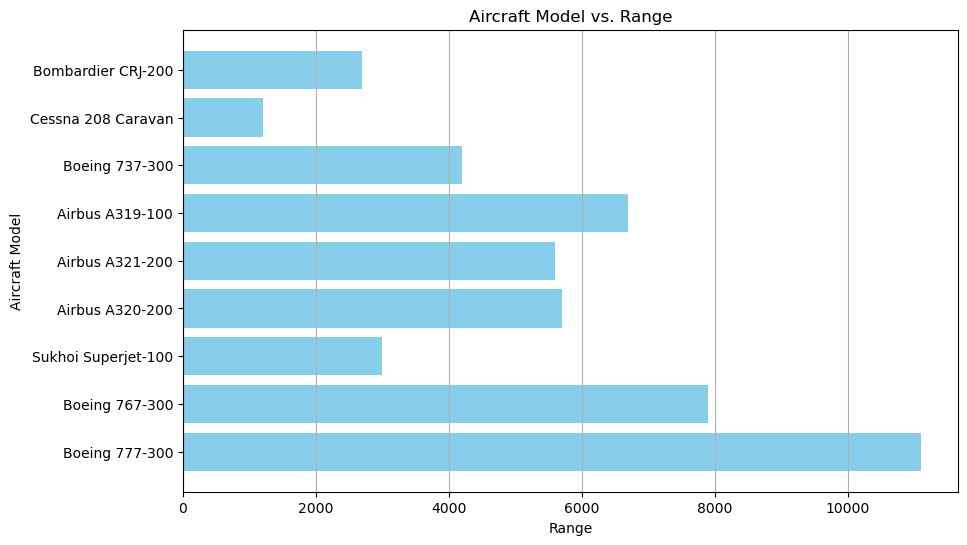

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(aircrafts_data['model'], aircrafts_data['range'], color='skyblue')
plt.xlabel('Range')
plt.ylabel('Aircraft Model')
plt.title('Aircraft Model vs. Range')
plt.grid(axis='x') 
plt.show()

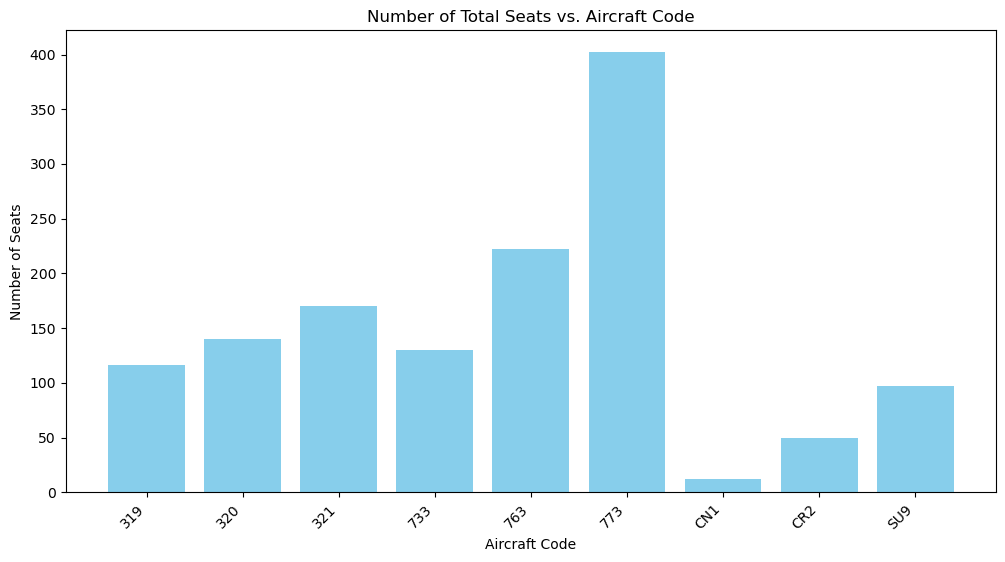

In [23]:
seats_per_aircraft = seats.groupby('aircraft_code')['seat_no'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(seats_per_aircraft['aircraft_code'], seats_per_aircraft['seat_no'], color='skyblue')
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Seats')
plt.title('Number of Total Seats vs. Aircraft Code')
plt.xticks(rotation=45, ha='right')
plt.show()

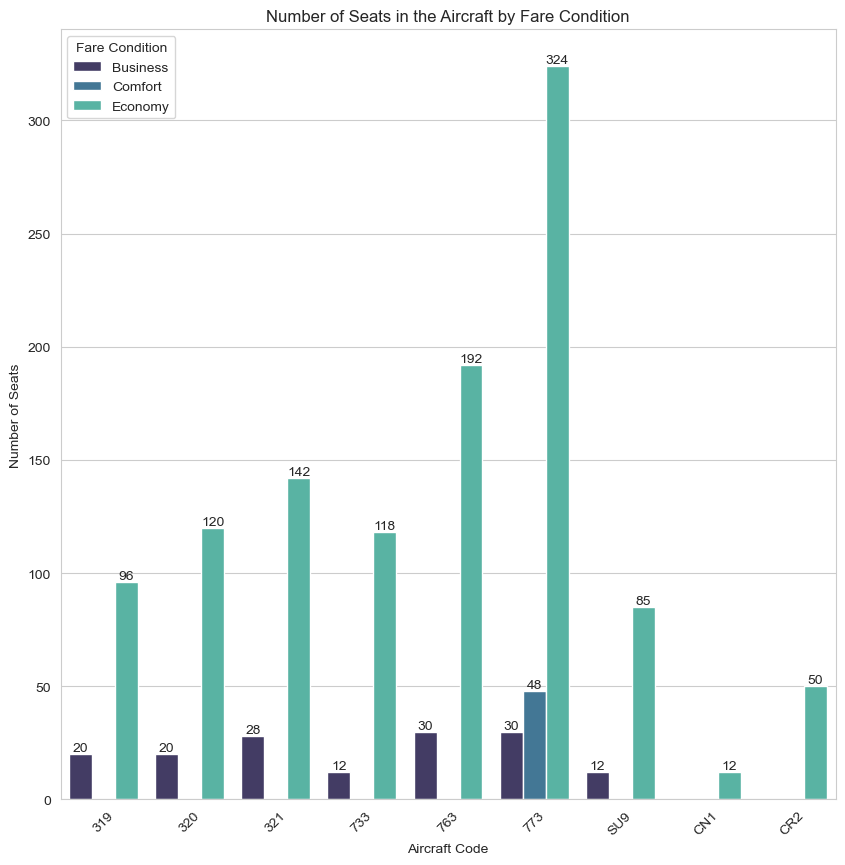

,fare_conditions,aircraft_code,seat_count
0,Business,319,20
1,Business,320,20
2,Business,321,28
3,Business,733,12
4,Business,763,30
5,Business,773,30
6,Business,SU9,12
7,Comfort,773,48
8,Economy,319,96
9,Economy,320,120


In [24]:
# Group seats by fare_conditions and aircraft_code, and count the number of seats
seats_per_fare_per_aircraft = seats.groupby(['fare_conditions', 'aircraft_code']).size().reset_index(name='seat_count')

# Convert 'seat_count' column to numeric type
seats_per_fare_per_aircraft = seats_per_fare_per_aircraft.apply(pd.to_numeric, errors='ignore')

# Plot the number of seats for each fare condition and aircraft code using seaborn
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='aircraft_code', y='seat_count', hue='fare_conditions', data=seats_per_fare_per_aircraft, palette='mako')
ax.set(xlabel='Aircraft Code', ylabel='Number of Seats')
ax.legend(title='Fare Condition')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of Seats in the Aircraft by Fare Condition')
plt.xticks(rotation=45)
plt.show()

seats_per_fare_per_aircraft

In [25]:
# cleaning to create a better tickets table, adjusting the dates

tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date

tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


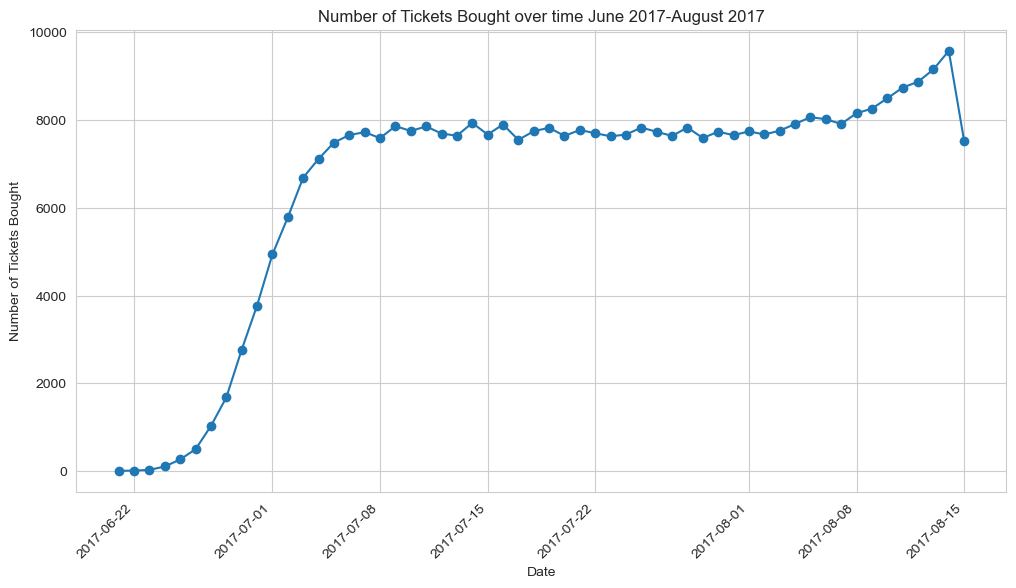

In [26]:
# Group by date and calculate the number of tickets for each date
tickets_by_date = tickets.groupby('date')['ticket_no'].count().reset_index()

# Plot the number of tickets bought vs. date
plt.figure(figsize=(12, 6))
plt.plot(tickets_by_date['date'], tickets_by_date['ticket_no'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Bought')
plt.title('Number of Tickets Bought over time June 2017-August 2017')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

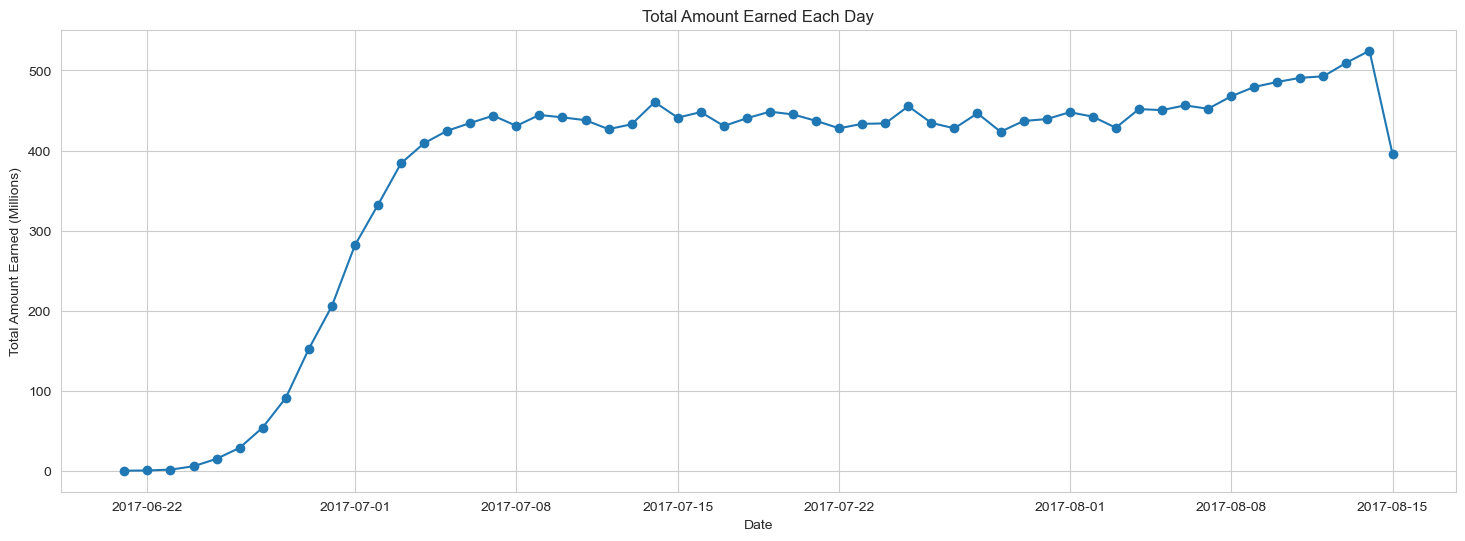

In [27]:
# Read data from the SQL query
bookings = pd.read_sql_query("SELECT * FROM bookings", connection)
# Convert to datetime format
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
# Take only the date for the graph
bookings['date'] = bookings['book_date'].dt.date
# Group the bookings by date
booking_amount = bookings.groupby('date')[['total_amount']].sum()
# Convert total amount to millions
booking_amount['total_amount_millions'] = booking_amount['total_amount'] / 1e6

plt.figure(figsize=(18, 6))
plt.plot(booking_amount.index, booking_amount['total_amount_millions'], marker='o', linestyle='-')
plt.title('Total Amount Earned Each Day')
plt.xlabel('Date')
plt.ylabel('Total Amount Earned (Millions)')
plt.grid(True)
plt.show()

We notice a strong increase in total amount earned per day and number of tickets purchased around the first week of July, this could signal peak summer travel season.

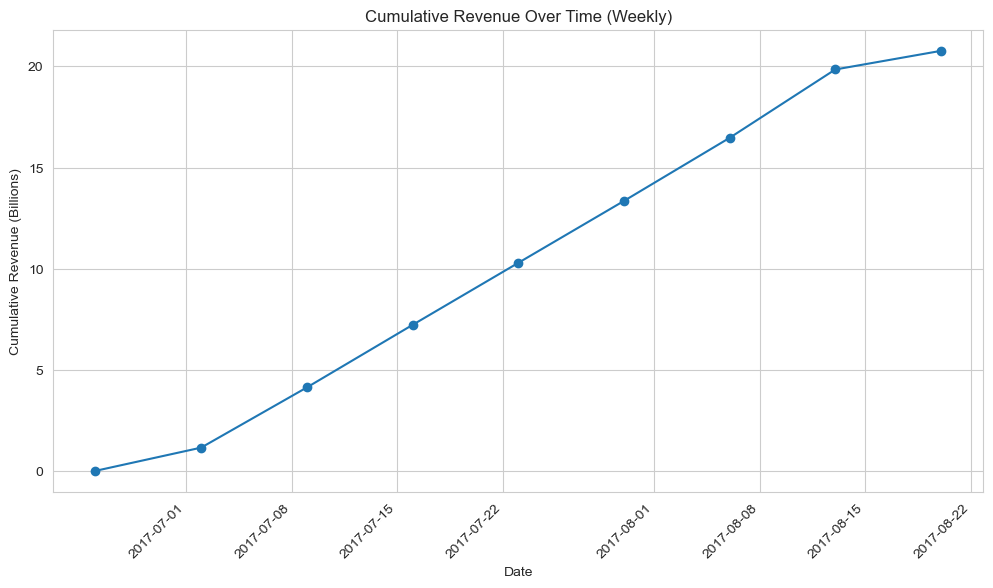

In [28]:
# Read data from the SQL query
bookings = pd.read_sql_query("SELECT * FROM bookings", connection)

# Convert to datetime format
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
# Group by weekly frequency and calculate cumulative sum
cumulative_revenue_by_date = bookings.groupby(pd.Grouper(key='book_date', freq='W'))['total_amount'].sum().cumsum().reset_index()

# Convert total amount to billions
cumulative_revenue_by_date['total_amount_billions'] = cumulative_revenue_by_date['total_amount'] / 1e9

plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_by_date['book_date'], cumulative_revenue_by_date['total_amount_billions'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue (Billions)')
plt.title('Cumulative Revenue Over Time (Weekly)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

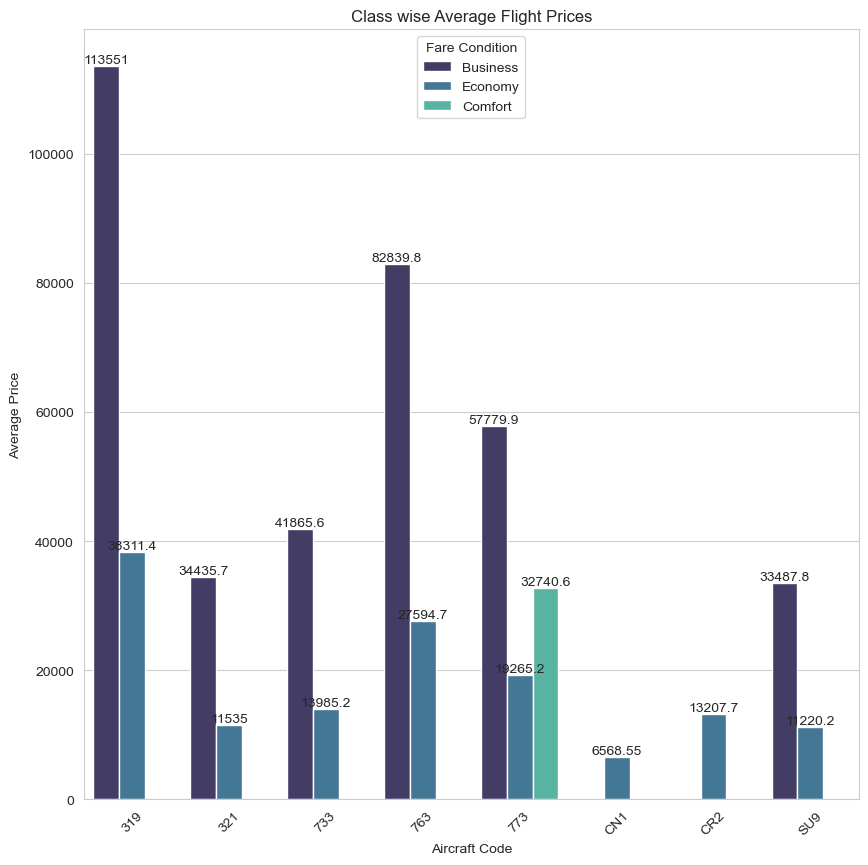

,fare_conditions,aircraft_code,avg_price
0,Business,319,113550.56
1,Economy,319,38311.40
2,Business,321,34435.66
3,Economy,321,11534.97
4,Business,733,41865.63
5,Economy,733,13985.15
6,Business,763,82839.84
7,Economy,763,27594.72
8,Business,773,57779.91
9,Comfort,773,32740.55


In [29]:
class_wise_avg_prices = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) AS avg_price 
                        from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='aircraft_code',y='avg_price',hue='fare_conditions', data=class_wise_avg_prices, palette = 'mako')
ax.set(xlabel='Aircraft Code', ylabel='Average Price')
ax.legend(title='Fare Condition')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class wise Average Flight Prices')
plt.xticks(rotation=45)
plt.show()

class_wise_avg_prices

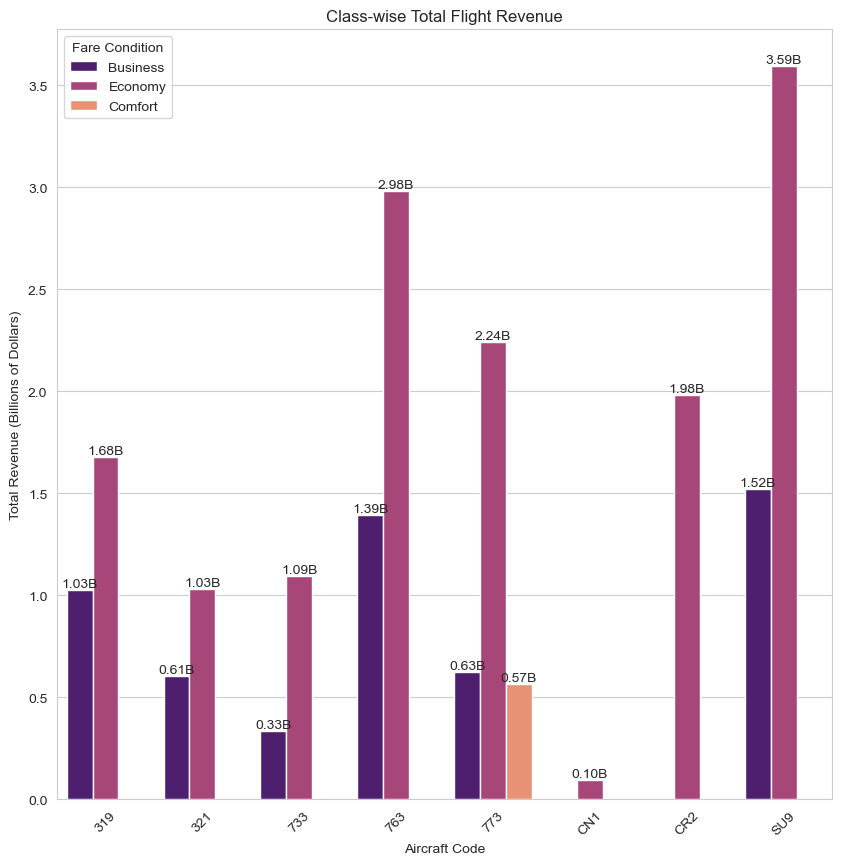

In [30]:
# Calculate total flight revenue per fare_condition and aircraft_code
query = """
SELECT 
    fare_conditions,
    aircraft_code,
    SUM(amount) AS total_amount
FROM ticket_flights
JOIN flights ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code, fare_conditions
"""

# Read data from the SQL query
df_total_revenue = pd.read_sql_query(query, connection)

# Convert total amount to billions of dollars
df_total_revenue['total_amount_billions'] = df_total_revenue['total_amount'] / 1e9

# Plotting
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='aircraft_code', y='total_amount_billions', hue='fare_conditions', data=df_total_revenue, palette='magma')
ax.set(xlabel='Aircraft Code', ylabel='Total Revenue (Billions of Dollars)')
ax.legend(title='Fare Condition')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2fB')  # Format labels in billions
plt.title('Class-wise Total Flight Revenue')
plt.xticks(rotation=45)
plt.show()

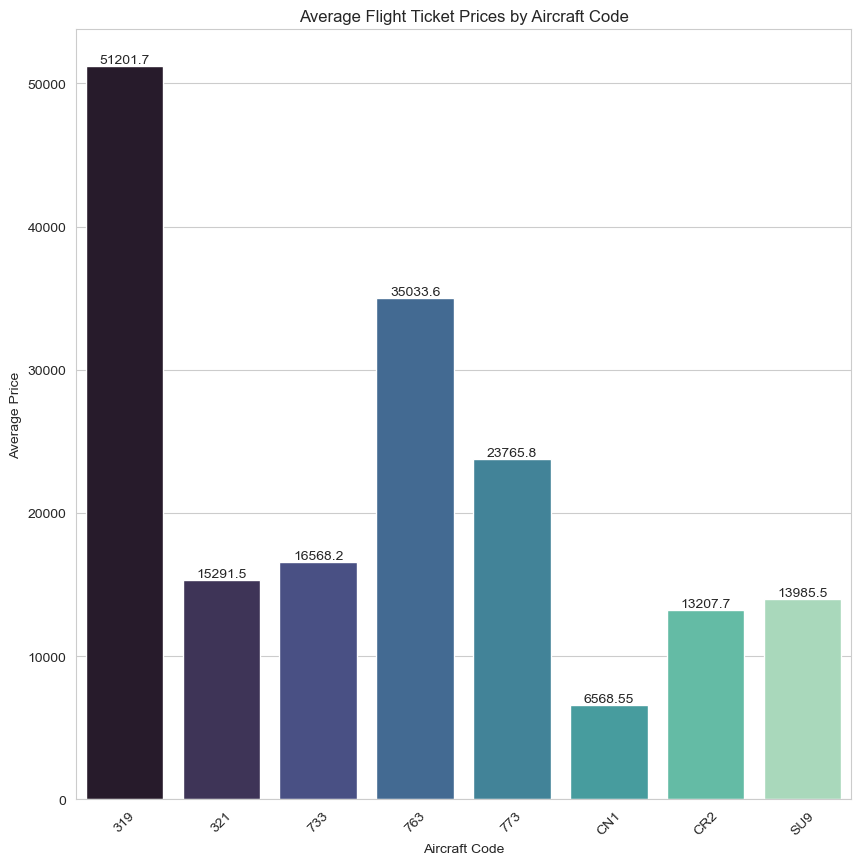

,aircraft_code,avg_price
0,319,51201.69
1,321,15291.51
2,733,16568.16
3,763,35033.56
4,773,23765.76
5,CN1,6568.55
6,CR2,13207.66
7,SU9,13985.54


In [32]:
query = """
SELECT aircraft_code, AVG(amount) AS avg_price
FROM ticket_flights
JOIN flights ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code
"""

# Read data from the SQL query into a DataFrame
avg_prices_by_aircraft = pd.read_sql_query(query, connection)

# Plotting
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='aircraft_code', y='avg_price', data=avg_prices_by_aircraft, palette='mako')
ax.set(xlabel='Aircraft Code', ylabel='Average Price')
ax.set_title('Average Flight Ticket Prices by Aircraft Code')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.show()

avg_prices_by_aircraft

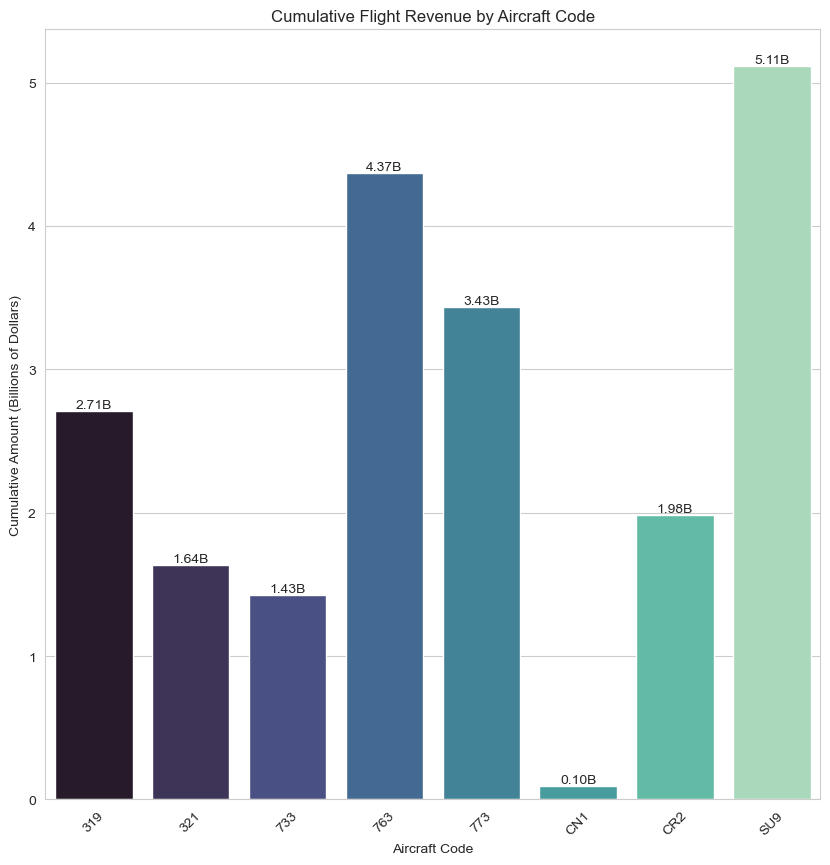

In [33]:
query = """
SELECT aircraft_code, SUM(amount) AS cumulative_amount
FROM ticket_flights
JOIN flights ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code
"""

# Read data from the SQL query into a DataFrame
df = pd.read_sql_query(query, connection)

# Convert cumulative amount to billions of dollars
df['cumulative_amount_billions'] = df['cumulative_amount'] / 1e9

# Plotting
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='aircraft_code', y='cumulative_amount_billions', data=df, palette='mako')
ax.set(xlabel='Aircraft Code', ylabel='Cumulative Amount (Billions of Dollars)')
ax.set_title('Cumulative Flight Revenue by Aircraft Code')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2fB')  # Format labels in billions
plt.xticks(rotation=45)
plt.show()

## Business data analysis

### What is the total revenue generated by airline from bookings?

In [34]:
total_revenue = bookings['total_amount'].sum()

print(f'Total Revenue from Bookings: {total_revenue}')

Total Revenue from Bookings: 20766980900


### What is the average occupancy rate for each aircraft?

Using the boarding_passes table and the flights table, as well as our previously created seats_per_aircraft table, we want to return a table containing the average booked seats, average seats per aircraft, and occupancy rate for each aircraft. 

Our strategy will be to first inner join the boarding_passes and flights tables on flight_id and then calculate the total amount of seats booked for each aircraft_code and divide that number by the unique number of flight_ids for each aircraft_code to find the average number of booked seats. 

Once we calculate average_booked_seats, then we can divide that by the number of seats on each aircraft from our seats_per_aircraft_table to find an average occupancy rate.

In [35]:
query = """
SELECT 
    flights.aircraft_code,
    COUNT(boarding_passes.seat_no) / COUNT(DISTINCT flights.flight_id) AS average_booked_seats
FROM boarding_passes INNER JOIN flights ON boarding_passes.flight_id = flights.flight_id
GROUP BY flights.aircraft_code
"""

# Read data from the SQL query into a DataFrame
average_booked_seats = pd.read_sql_query(query, connection)

occupancy_rate = pd.merge(average_booked_seats, seats_per_aircraft, on='aircraft_code', how='inner')

# Calculate occupancy rate and add a new column
occupancy_rate['occupancy_rate'] = (occupancy_rate['average_booked_seats'] / occupancy_rate['seat_no']) * 100

occupancy_rate

,aircraft_code,average_booked_seats,seat_no,occupancy_rate
0,319,53,116,45.69
1,321,88,170,51.76
2,733,80,130,61.54
3,763,113,222,50.90
4,773,264,402,65.67
5,CN1,6,12,50.00
6,CR2,21,50,42.00
7,SU9,56,97,57.73


### Calculate potential increased revenue from increased occupancy rate

### Occupancy rate increase by 10% per aircraft


In [36]:
# Create a column showing a 10% increase in occupancy rate of each aircraft

occupancy_rate['10pct_occupancy_rate'] = (occupancy_rate['occupancy_rate'] * 0.10) + occupancy_rate['occupancy_rate']

# Create a column showing the additional average seats (tickets) booked

occupancy_rate['10pct_add_seats'] = (occupancy_rate['seat_no'] * (0.01 * occupancy_rate['10pct_occupancy_rate'])) - (occupancy_rate['average_booked_seats'])

# Create column showing the additional revenue created by increasing occupancy rate

occupancy_rate['10pct_add_revenue'] = (occupancy_rate['10pct_add_seats'] * avg_prices_by_aircraft['avg_price'])


occupancy_rate



,aircraft_code,average_booked_seats,seat_no,occupancy_rate,10pct_occupancy_rate,10pct_add_seats,10pct_add_revenue
0,319,53,116,45.69,50.26,5.30,271368.97
1,321,88,170,51.76,56.94,8.80,134565.28
2,733,80,130,61.54,67.69,8.00,132545.32
3,763,113,222,50.90,55.99,11.30,395879.20
4,773,264,402,65.67,72.24,26.40,627416.09
5,CN1,6,12,50.00,55.00,0.60,3941.13
6,CR2,21,50,42.00,46.20,2.10,27736.09
7,SU9,56,97,57.73,63.51,5.60,78319.03


### Occupancy rate increase by 20% per aircraft

In [37]:
# Create a column showing a 20% increase in occupancy rate of each aircraft

occupancy_rate['20pct_occupancy_rate'] = (occupancy_rate['occupancy_rate'] * 0.20) + occupancy_rate['occupancy_rate']

# Create a column showing the additional average seats (tickets) booked

occupancy_rate['20pct_add_seats'] = (occupancy_rate['seat_no'] * (0.01 * occupancy_rate['20pct_occupancy_rate'])) - (occupancy_rate['average_booked_seats'])

# Create column showing the additional revenue created by increasing occupancy rate

occupancy_rate['20pct_add_revenue'] = (occupancy_rate['20pct_add_seats'] * avg_prices_by_aircraft['avg_price'])


occupancy_rate


,aircraft_code,average_booked_seats,seat_no,occupancy_rate,10pct_occupancy_rate,10pct_add_seats,10pct_add_revenue,20pct_occupancy_rate,20pct_add_seats,20pct_add_revenue
0,319,53,116,45.69,50.26,5.30,271368.97,54.83,10.60,542737.95
1,321,88,170,51.76,56.94,8.80,134565.28,62.12,17.60,269130.56
2,733,80,130,61.54,67.69,8.00,132545.32,73.85,16.00,265090.63
3,763,113,222,50.90,55.99,11.30,395879.20,61.08,22.60,791758.40
4,773,264,402,65.67,72.24,26.40,627416.09,78.81,52.80,1254832.18
5,CN1,6,12,50.00,55.00,0.60,3941.13,60.00,1.20,7882.26
6,CR2,21,50,42.00,46.20,2.10,27736.09,50.40,4.20,55472.18
7,SU9,56,97,57.73,63.51,5.60,78319.03,69.28,11.20,156638.07


### Takeaways from occupancy rate analysis

From our calculations of the impacts of a 10 percent or 20 percent increase in occupancy rate, we see that aircraft such as the 773 have the most to gain from an increased occupancy rate. In the 20 percent occupancy increase, we saw that the 773 gained 1,254,832.18 in added revenue. The 763 came in second with 791,758.40 in added revenue. Meanwhile, aircraft like the CN1 provide nearly no gain for the airline (7882.26). The SU9 is the aircraft that generates the most cumulative revenue likely due to its low ticket prices, however increasing the occupancy rate doesn't show us that it would give us the best gains.

The 773 and 763 gain the most revenue most likely because they have more economy seating and seating in general, allowing more tickets to be sold. By filling these open seats, the airline company can stand to improve profit. The airline can possibly look at decreasing ticket prices to sell more tickets, or improve advertising. These approaches come with a potential loss and require statistical calculations to ensure the company doesn't lose money.

### What is the average occupancy rate for each aircraft by fare conditions?

In addition to which aircrafts can help the airline generate more revenue, we want to examine which fare conditions on these airlines will generate more revenue.

### 10 percent increase of occupancy rate by aircraft code and fare conditions

In [49]:
query = """
SELECT 
    flights.aircraft_code,
    ticket_flights.fare_conditions,
    COUNT(ticket_flights.ticket_no) / COUNT(DISTINCT flights.flight_id) AS average_booked_seats
FROM 
    ticket_flights 
    INNER JOIN flights ON ticket_flights.flight_id = flights.flight_id
GROUP BY 
    flights.aircraft_code,
    ticket_flights.fare_conditions
"""

# Read data from the SQL query into a DataFrame
average_booked_seats_by_fare = pd.read_sql_query(query, connection)

average_booked_seats_by_fare = pd.merge(average_booked_seats_by_fare, seats_per_fare_per_aircraft, on=['aircraft_code', 'fare_conditions'], how='inner')

average_booked_seats_by_fare['occupancy_rate'] = (average_booked_seats_by_fare['average_booked_seats'] / average_booked_seats_by_fare['seat_count']) * 100

average_booked_seats_by_fare

# Create a column showing a 10% increase in occupancy rate of each aircraft

average_booked_seats_by_fare['10pct_occupancy_rate'] = (average_booked_seats_by_fare['occupancy_rate'] * 0.10) + average_booked_seats_by_fare['occupancy_rate']

# Create a column showing the additional average seats (tickets) booked

average_booked_seats_by_fare['10pct_add_seats'] = (average_booked_seats_by_fare['seat_count'] * (0.01 * average_booked_seats_by_fare['10pct_occupancy_rate'])) - (average_booked_seats_by_fare['average_booked_seats'])

# Create column showing the additional revenue created by increasing occupancy rate

average_booked_seats_by_fare['10pct_add_revenue'] = (average_booked_seats_by_fare['10pct_add_seats'] * class_wise_avg_prices['avg_price'])

average_booked_seats_by_fare

,aircraft_code,fare_conditions,average_booked_seats,seat_count,occupancy_rate,10pct_occupancy_rate,10pct_add_seats,10pct_add_revenue
0,319,Business,8,20,40.00,44.00,0.80,90840.45
1,319,Economy,41,96,42.71,46.98,4.10,157076.75
2,321,Business,14,28,50.00,55.00,1.40,48209.93
3,321,Economy,69,142,48.59,53.45,6.90,79591.33
4,733,Business,7,12,58.33,64.17,0.70,29305.94
5,733,Economy,67,118,56.78,62.46,6.70,93700.52
6,763,Business,14,30,46.67,51.33,1.40,115975.78
7,763,Economy,90,192,46.88,51.56,9.00,248352.50
8,773,Business,18,30,60.00,66.00,1.80,104003.84
9,773,Comfort,28,48,58.33,64.17,2.80,91673.55


From the table, we see that the most additional revenue gained by increasing the occupancy rate by 10% is from the 773 economy class (367,965.81), 763 economy class (248,352.50), and 319 economy class (157,076.75). The 763 business class and 773 business class also have revenue increase of over 100,000.

### Conclusion

From our data analysis, we have picked out specific aircraft such as the 773, 763, and 319 planes that the airline can prioritize. We also picked specific classes such as the 773 economy, 763 economy, and 319 economy that the airline can look at increasing the occupancy rate of. 

Possible ways to accomplish increasing the occupancy rate could be to make a push with marketing and advertising or to lower ticket prices or to add some deals that will attract more customers and help the company in the long-run. In order to find if these strategies are profitable, companies will need to do further statistical analysis and balance their revenue with their potential expenses from these strategies.